### Prepare phenoype for subtype analysis : wm task

- Build a scrubbing file to be used on subtype analysis for wm task
- Add mean run1 and run1 for FD an FD_scrubbed
- Visualize correlation between run 1 and 2 for FD and FD scrubbed
- merge clustered phenotype with scrubbing

In [1]:
# Import pandas
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
%matplotlib inline

In [31]:
# Set path
#path_root = "~/Drive/HCP/"
path_root = "/media/yassine/data_disk/Drive/HCP2/"
path_scrub = os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/qc_scrubbing_group.csv")
# Read scrubbing file
scrub_raw = pd.read_csv(path_scrub)
scrub_raw.head(20)

,,frames_scrubbed,frames_OK,FD,FD_scrubbed
0,HCP100206_sess1_wmRL,0.0,405.0,0.083342,0.083342
1,HCP100206_sess1_wmLR,0.0,405.0,0.082368,0.082368
2,HCP100206_sess1_gambRL,0.0,253.0,0.081728,0.081728
3,HCP100206_sess1_gambLR,0.0,253.0,0.098565,0.098565
4,HCP100206_sess1_motRL,0.0,284.0,0.090883,0.090883
5,HCP100206_sess1_motLR,0.0,284.0,0.090883,0.090883
6,HCP100206_sess2_langRL,0.0,316.0,0.088456,0.088456
7,HCP100206_sess2_langLR,0.0,316.0,0.099963,0.099963
8,HCP100206_sess2_socRL,0.0,274.0,0.084949,0.084949
9,HCP100206_sess2_socLR,0.0,274.0,0.096656,0.096656


In [32]:
# Select specific task
# run1
scrub_select_RL = scrub_raw[scrub_raw[' '].str.contains("wmRL")]
scrub_select_RL.rename(columns={'FD_scrubbed':'FD_scrubbed_RL','FD ':'FD_RL'},inplace=True)
scrub_select_RL.loc[:,'ID'] = scrub_select_RL[' '].str.replace('_sess1_wmRL ','')

# run2 
scrub_select_LR = scrub_raw[scrub_raw[' '].str.contains("wmLR")]
scrub_select_LR.rename(columns={'FD_scrubbed':'FD_scrubbed_LR','FD ':'FD_LR'},inplace=True)
scrub_select_LR.loc[:,'ID'] = scrub_select_LR[' '].str.replace('_sess1_wmLR ','')

display(scrub_select_RL.head())
display(scrub_select_LR.head())

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view

,,frames_scrubbed,frames_OK,FD_RL,FD_scrubbed_RL,ID
0,HCP100206_sess1_wmRL,0.0,405.0,0.083342,0.083342,HCP100206
14,HCP100307_sess1_wmRL,0.0,405.0,0.095924,0.095924,HCP100307
28,HCP100408_sess1_wmRL,14.0,391.0,0.133898,0.129641,HCP100408
42,HCP100610_sess1_wmRL,0.0,405.0,0.155579,0.155579,HCP100610
56,HCP101006_sess1_wmRL,0.0,405.0,0.111923,0.111923,HCP101006


,,frames_scrubbed,frames_OK,FD_LR,FD_scrubbed_LR,ID
1,HCP100206_sess1_wmLR,0.0,405.0,0.082368,0.082368,HCP100206
15,HCP100307_sess1_wmLR,0.0,405.0,0.093332,0.093332,HCP100307
29,HCP100408_sess1_wmLR,52.0,353.0,0.150610,0.139477,HCP100408
43,HCP100610_sess1_wmLR,0.0,405.0,0.143473,0.143473,HCP100610
57,HCP101006_sess1_wmLR,0.0,405.0,0.133317,0.133317,HCP101006


In [33]:
# Select interest variables
scrub_select_LR_merge = scrub_select_LR [[' ','FD_LR','FD_scrubbed_LR','ID']]
scrub_select_RL_merge = scrub_select_RL [[' ','FD_RL','FD_scrubbed_RL','ID']]
display(scrub_select_RL_merge.head())
display(scrub_select_LR_merge.head())

,,FD_RL,FD_scrubbed_RL,ID
0,HCP100206_sess1_wmRL,0.083342,0.083342,HCP100206
14,HCP100307_sess1_wmRL,0.095924,0.095924,HCP100307
28,HCP100408_sess1_wmRL,0.133898,0.129641,HCP100408
42,HCP100610_sess1_wmRL,0.155579,0.155579,HCP100610
56,HCP101006_sess1_wmRL,0.111923,0.111923,HCP101006


,,FD_LR,FD_scrubbed_LR,ID
1,HCP100206_sess1_wmLR,0.082368,0.082368,HCP100206
15,HCP100307_sess1_wmLR,0.093332,0.093332,HCP100307
29,HCP100408_sess1_wmLR,0.150610,0.139477,HCP100408
43,HCP100610_sess1_wmLR,0.143473,0.143473,HCP100610
57,HCP101006_sess1_wmLR,0.133317,0.133317,HCP101006


In [34]:
# Merge the raw table 
if np.shape(scrub_select_RL_merge)[0] >= np.shape(scrub_select_LR_merge)[0]:
    merged_scrub_RL_LR = pd.merge(scrub_select_RL_merge, scrub_select_LR_merge, on='ID', how='left')
else:
    merged_scrub_RL_LR = pd.merge(scrub_select_RL_merge, scrub_select_LR_merge, on='ID', how='right')



In [35]:
merged_scrub_RL_LR.head()

,_x,FD_RL,FD_scrubbed_RL,ID,_y,FD_LR,FD_scrubbed_LR
0,HCP100206_sess1_wmRL,0.083342,0.083342,HCP100206,HCP100206_sess1_wmLR,0.082368,0.082368
1,HCP100307_sess1_wmRL,0.095924,0.095924,HCP100307,HCP100307_sess1_wmLR,0.093332,0.093332
2,HCP100408_sess1_wmRL,0.133898,0.129641,HCP100408,HCP100408_sess1_wmLR,0.150610,0.139477
3,HCP100610_sess1_wmRL,0.155579,0.155579,HCP100610,HCP100610_sess1_wmLR,0.143473,0.143473
4,HCP101006_sess1_wmRL,0.111923,0.111923,HCP101006,HCP101006_sess1_wmLR,0.133317,0.133317


In [36]:
merged_scrub_RL_LR_subset = merged_scrub_RL_LR[['ID','FD_RL','FD_scrubbed_RL','FD_LR','FD_scrubbed_LR']]

In [37]:
merged_scrub_RL_LR_subset.head()

,ID,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR
0,HCP100206,0.083342,0.083342,0.082368,0.082368
1,HCP100307,0.095924,0.095924,0.093332,0.093332
2,HCP100408,0.133898,0.129641,0.150610,0.139477
3,HCP100610,0.155579,0.155579,0.143473,0.143473
4,HCP101006,0.111923,0.111923,0.133317,0.133317


In [38]:
# calculate the mean FD and FD scrubbed
merged_scrub_RL_LR_subset.loc[:,'FD_scrubbed_mean'] = merged_scrub_RL_LR_subset[['FD_scrubbed_RL','FD_scrubbed_LR']].mean(axis=1)
merged_scrub_RL_LR_subset.loc[:,'FD_mean'] = merged_scrub_RL_LR_subset[['FD_RL','FD_LR']].mean(axis=1)

# replace empty cell by nan
merged_scrub_RL_LR_subset.replace('',np.nan,inplace=True)

# remove the ID header for niak_read_csv
merged_scrub_RL_LR_subset.rename(columns={'ID':''},inplace=True)

# Save the file
merged_scrub_RL_LR_subset.to_csv(os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/qc_scrubbing_group_wm.csv"), index=False)

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [39]:
# Show final table
merged_scrub_RL_LR_subset.head()

,,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR,FD_scrubbed_mean,FD_mean
0,HCP100206,0.083342,0.083342,0.082368,0.082368,0.082855,0.082855
1,HCP100307,0.095924,0.095924,0.093332,0.093332,0.094628,0.094628
2,HCP100408,0.133898,0.129641,0.150610,0.139477,0.134559,0.142254
3,HCP100610,0.155579,0.155579,0.143473,0.143473,0.149526,0.149526
4,HCP101006,0.111923,0.111923,0.133317,0.133317,0.122620,0.122620


In [40]:
merged_scrub_RL_LR_subset.describe()

,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR,FD_scrubbed_mean,FD_mean
count,854.000000,854.000000,857.000000,857.000000,857.000000,857.000000
mean,0.135531,0.126799,0.139276,0.127823,0.127263,0.137443
std,0.046041,0.034626,0.054867,0.035465,0.034086,0.047702
min,0.059240,0.059240,0.063550,0.063550,0.063517,0.063517
25%,0.102381,0.100345,0.103857,0.101148,0.100613,0.103506
50%,0.125175,0.120791,0.126694,0.121458,0.121756,0.126761
75%,0.157457,0.145533,0.160875,0.148380,0.147249,0.159714
max,0.500791,0.296663,0.716237,0.267712,0.278963,0.471144


In [41]:
# find out if variables are correlated
corr= merged_scrub_RL_LR_subset.corr()

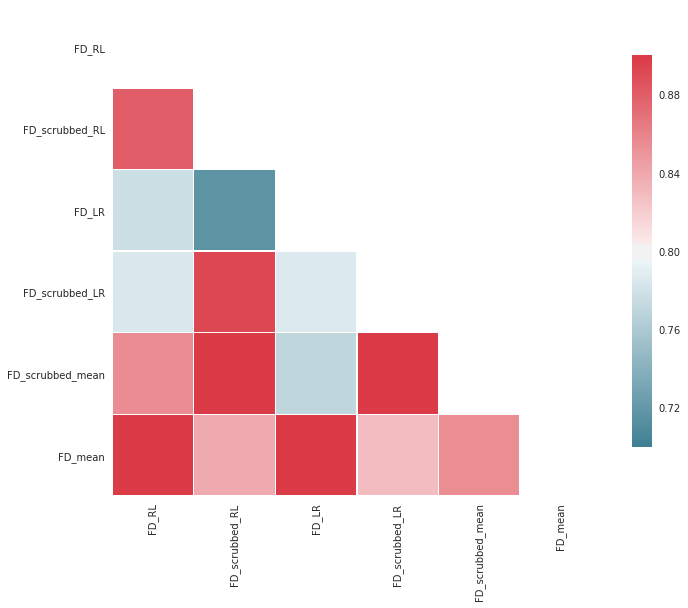

In [42]:
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap,vmax=0.9,vmin=0.7,
            square=True,mask=mask,
            linewidths=.5, cbar_kws={"shrink": .8}, ax=ax)

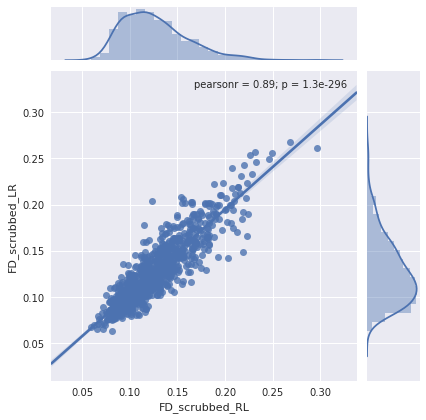

In [43]:
# FD_scrubbed correlation between runs
sns.set(color_codes=True)
sns.jointplot(x="FD_scrubbed_RL", y="FD_scrubbed_LR", data=merged_scrub_RL_LR_subset,kind="reg");

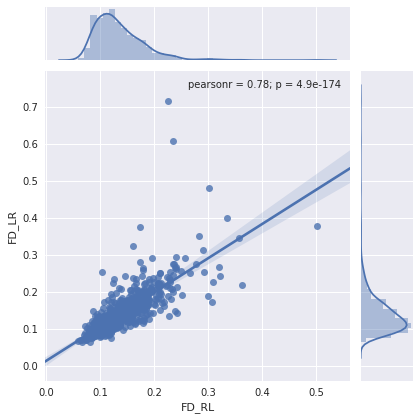

In [44]:
# FD correlation between runs
sns.set(color_codes=True)
sns.jointplot(x="FD_RL", y="FD_LR", data=merged_scrub_RL_LR_subset,kind="reg");

### merge clustered pheno with age gender and handedness

In [45]:
## merge clustered pheno with age gender and handedness
pheno_raw = pd.read_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/hcp_all_pheno.csv'))
pheno_raw = pheno_raw.rename(columns=lambda x: x.strip())
pheno_clust = pd.read_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/hcp_bootstraped_pheno_nonan_norm_python.csv'))
pheno_clust = pheno_clust.rename(columns=lambda x: x.strip())

In [46]:
merged_pheno = pd.merge(pheno_raw[['Subject','Age_in_Yrs','Gender','Twin_Stat','Zygosity','Mother_ID','BMI',"BPSystolic","BPDiastolic"]],
                        pheno_clust, on='Subject', how='right')
merged_pheno.loc[:,'Subject'] = 'HCP' + merged_pheno['Subject'].astype(str)
merged_pheno.head()

,Subject,Age_in_Yrs,Gender,Twin_Stat,Zygosity,Mother_ID,BMI,BPSystolic,BPDiastolic,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,Cluster_10
0,HCP100004,24,M,NotTwin,NotTwin,52259,25.49,135.0,77.0,0.134739,1.185358,-0.279920,0.085162,0.466965,-1.530547,0.398510,0.010144,-0.015847,-0.719794
1,HCP100206,27,M,NotTwin,NotTwin,56037,26.64,119.0,71.0,-0.344595,1.283574,0.052662,1.436342,0.706008,-0.510366,1.975280,1.294323,-0.025888,-0.203825
2,HCP100307,27,F,Twin,NotMZ,51488,22.96,117.0,70.0,-0.639736,0.522789,-0.952467,-0.713226,-0.559144,-0.140952,-0.703027,0.229112,0.097581,-0.444702
3,HCP100408,33,M,Twin,MZ,51730,27.75,152.0,94.0,1.173656,0.092160,-0.521888,-0.034026,-0.109229,0.221359,-0.589268,0.357483,-0.039443,0.095913
4,HCP100610,27,M,Twin,NotMZ,52813,36.91,141.0,75.0,0.891096,-0.361182,-0.881930,-0.386394,-0.575076,-0.197974,0.203063,0.618868,0.491618,1.343114


In [47]:
# check if there is any nan value
merged_pheno.isnull().values.any()

True

In [48]:
# remove missing 
missing = np.array([merged_pheno[col].isnull().values for col in merged_pheno.columns.get_values()]).any(0)
merged_pheno_clean = merged_pheno[~missing]
merged_pheno_clean.count()

Subject        927
Age_in_Yrs     927
Gender         927
Twin_Stat      927
Zygosity       927
Mother_ID      927
BMI            927
BPSystolic     927
BPDiastolic    927
Cluster_1      927
Cluster_2      927
Cluster_3      927
Cluster_4      927
Cluster_5      927
Cluster_6      927
Cluster_7      927
Cluster_8      927
Cluster_9      927
Cluster_10     927
dtype: int64

In [49]:
# set gender to numerical
merged_pheno_clean.loc[:,'Gender']= merged_pheno_clean.Gender.replace({'M':1,'F':2})

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [50]:
merged_pheno_clean.head()

,Subject,Age_in_Yrs,Gender,Twin_Stat,Zygosity,Mother_ID,BMI,BPSystolic,BPDiastolic,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,Cluster_10
0,HCP100004,24,1,NotTwin,NotTwin,52259,25.49,135.0,77.0,0.134739,1.185358,-0.279920,0.085162,0.466965,-1.530547,0.398510,0.010144,-0.015847,-0.719794
1,HCP100206,27,1,NotTwin,NotTwin,56037,26.64,119.0,71.0,-0.344595,1.283574,0.052662,1.436342,0.706008,-0.510366,1.975280,1.294323,-0.025888,-0.203825
2,HCP100307,27,2,Twin,NotMZ,51488,22.96,117.0,70.0,-0.639736,0.522789,-0.952467,-0.713226,-0.559144,-0.140952,-0.703027,0.229112,0.097581,-0.444702
3,HCP100408,33,1,Twin,MZ,51730,27.75,152.0,94.0,1.173656,0.092160,-0.521888,-0.034026,-0.109229,0.221359,-0.589268,0.357483,-0.039443,0.095913
4,HCP100610,27,1,Twin,NotMZ,52813,36.91,141.0,75.0,0.891096,-0.361182,-0.881930,-0.386394,-0.575076,-0.197974,0.203063,0.618868,0.491618,1.343114


In [51]:
#put HCP prefix then merge with scrubing
merged_pheno_scrub = pd.merge(merged_scrub_RL_LR_subset,merged_pheno_clean,how='left',left_on='',right_on='Subject')

In [52]:
merged_pheno_scrub.count()

                    857
FD_RL               854
FD_scrubbed_RL      854
FD_LR               857
FD_scrubbed_LR      857
FD_scrubbed_mean    857
FD_mean             857
Subject             823
Age_in_Yrs          823
Gender              823
Twin_Stat           823
Zygosity            823
Mother_ID           823
BMI                 823
BPSystolic          823
BPDiastolic         823
Cluster_1           823
Cluster_2           823
Cluster_3           823
Cluster_4           823
Cluster_5           823
Cluster_6           823
Cluster_7           823
Cluster_8           823
Cluster_9           823
Cluster_10          823
dtype: int64

In [53]:
# remove subject with missing data
missing_merged = np.array([merged_pheno_scrub[col].isnull().values for col in merged_pheno_scrub.columns.get_values()]).any(0)
merged_pheno_scrub_clean = merged_pheno_scrub[~missing_merged]

In [54]:
merged_pheno_scrub_clean.count()

                    820
FD_RL               820
FD_scrubbed_RL      820
FD_LR               820
FD_scrubbed_LR      820
FD_scrubbed_mean    820
FD_mean             820
Subject             820
Age_in_Yrs          820
Gender              820
Twin_Stat           820
Zygosity            820
Mother_ID           820
BMI                 820
BPSystolic          820
BPDiastolic         820
Cluster_1           820
Cluster_2           820
Cluster_3           820
Cluster_4           820
Cluster_5           820
Cluster_6           820
Cluster_7           820
Cluster_8           820
Cluster_9           820
Cluster_10          820
dtype: int64

In [55]:
merged_pheno_scrub_clean.head(10)

,,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR,FD_scrubbed_mean,FD_mean,Subject,Age_in_Yrs,Gender,...,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,Cluster_10
0,HCP100206,0.083342,0.083342,0.082368,0.082368,0.082855,0.082855,HCP100206,27.0,1.0,...,-0.344595,1.283574,0.052662,1.436342,0.706008,-0.510366,1.975280,1.294323,-0.025888,-0.203825
1,HCP100307,0.095924,0.095924,0.093332,0.093332,0.094628,0.094628,HCP100307,27.0,2.0,...,-0.639736,0.522789,-0.952467,-0.713226,-0.559144,-0.140952,-0.703027,0.229112,0.097581,-0.444702
2,HCP100408,0.133898,0.129641,0.150610,0.139477,0.134559,0.142254,HCP100408,33.0,1.0,...,1.173656,0.092160,-0.521888,-0.034026,-0.109229,0.221359,-0.589268,0.357483,-0.039443,0.095913
3,HCP100610,0.155579,0.155579,0.143473,0.143473,0.149526,0.149526,HCP100610,27.0,1.0,...,0.891096,-0.361182,-0.881930,-0.386394,-0.575076,-0.197974,0.203063,0.618868,0.491618,1.343114
4,HCP101006,0.111923,0.111923,0.133317,0.133317,0.122620,0.122620,HCP101006,35.0,2.0,...,0.608381,0.037740,0.055531,-0.883482,-0.383174,-0.309221,-0.753780,-1.183212,0.031989,-0.494022
5,HCP101107,0.120820,0.068095,0.076125,0.076125,0.072110,0.098473,HCP101107,22.0,1.0,...,-0.922800,0.202094,0.163451,0.227207,1.339868,0.352401,-0.277470,0.305663,-0.032826,-0.151062
6,HCP101309,0.086692,0.086692,0.092831,0.089575,0.088134,0.089761,HCP101309,29.0,1.0,...,-0.921495,-1.054605,-0.307215,-0.783720,-0.312067,0.398342,-0.668765,-0.523430,-0.159725,0.312902
7,HCP101410,0.145737,0.145737,0.137565,0.137565,0.141651,0.141651,HCP101410,29.0,1.0,...,0.326811,-0.213178,-0.409235,0.039428,-0.441181,0.390266,-0.376479,0.087171,-0.504826,-0.082847
8,HCP101915,0.101955,0.101955,0.098969,0.098969,0.100462,0.100462,HCP101915,35.0,2.0,...,-0.859532,-0.837023,-0.057703,-0.375249,-0.365499,1.175929,-0.647998,-0.660448,-0.344353,1.135137
9,HCP102008,0.098808,0.098808,0.108268,0.108268,0.103538,0.103538,HCP102008,24.0,1.0,...,0.471527,-0.101898,0.151105,0.954806,0.491990,0.656850,0.058323,1.136948,0.198473,-0.027216


In [56]:
##save to csv
# for solar
merged_pheno_scrub_clean.to_csv(os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/hcp_pheno_wm_raw.csv"), index=False)
# for subtype
merged_pheno_scrub_clean.drop(['Subject','Twin_Stat', 'Zygosity'], axis=1).to_csv(os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/hcp_pheno_wm.csv"), index=False)